In [ ]:
# Step 1: Import the libraries I will need for this project

import pandas as pd        # to work with the stock price data in table form
import numpy as np         # for number calculations
import matplotlib.pyplot as plt  # to make line charts of stock prices

# ARIMA model for time series forecasting
from statsmodels.tsa.arima.model import ARIMA

# To check how accurate my forecast is
from sklearn.metrics import mean_squared_error


In [ ]:
# Step 2: Load Apple stock price data

# Install yfinance if not already installed
!pip install yfinance --quiet

import yfinance as yf

# Download Apple stock data (AAPL) from 2015 to 2023
df = yf.download("AAPL", start="2015-01-01", end="2023-12-31")

# Show first 5 rows
df.head()


/tmp/ipython-input-602457384.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2015-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.261044,24.729267,23.821668,24.718171,212818400
2015-01-05,23.577576,24.110152,23.391175,24.030265,257142000
2015-01-06,23.579794,23.839424,23.218085,23.641928,263188400
2015-01-07,23.910435,24.010292,23.677432,23.788385,160423600
2015-01-08,24.829130,24.886826,24.121248,24.238859,237458000


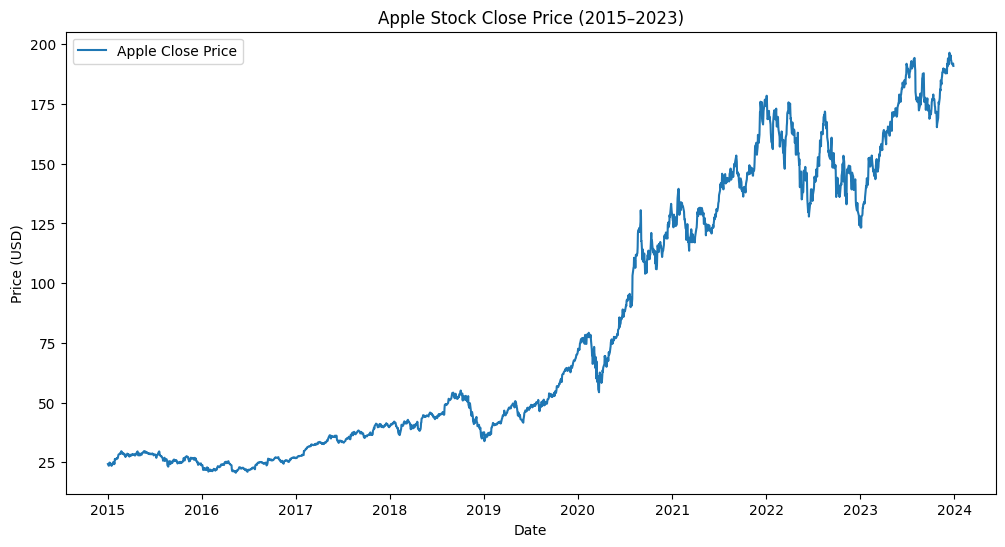

In [ ]:
# Step 3: Visualize the Close price trend

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Apple Close Price')
plt.title("Apple Stock Close Price (2015–2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [ ]:
# Step 4A: Select only the Close price for forecasting
data = df['Close']

# Show first few values
data.head()


Ticker,AAPL
Date,
2015-01-02,24.261044
2015-01-05,23.577576
2015-01-06,23.579794
2015-01-07,23.910435
2015-01-08,24.829130


In [ ]:
# Step 4B: Split data into training and testing sets

# Use 80% data for training, 20% for testing
train_size = int(len(data) * 0.8)

train, test = data[0:train_size], data[train_size:]

print("Training size:", len(train))
print("Testing size:", len(test))


Training size: 1811
Testing size: 453


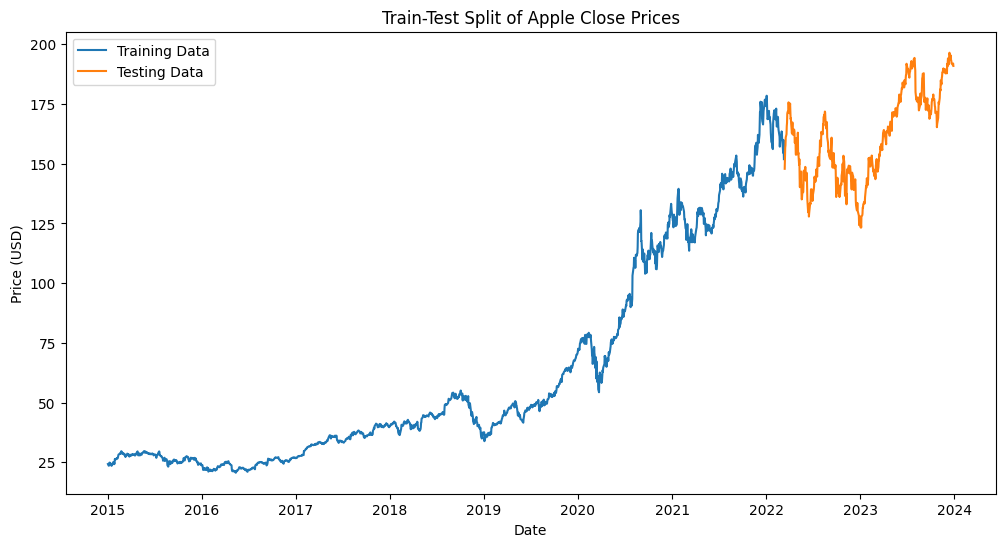

In [ ]:
# Step 4C: Visualize the training and testing split

plt.figure(figsize=(12,6))
plt.plot(train, label="Training Data")
plt.plot(test, label="Testing Data")
plt.title("Train-Test Split of Apple Close Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [3]:
import yfinance as yf

# Download Apple stock data again
df = yf.download("AAPL", start="2015-01-01", end="2023-12-31")

# Check the first few rows
df.head()


/tmp/ipython-input-2575626100.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2015-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.261047,24.729270,23.821672,24.718174,212818400
2015-01-05,23.577572,24.110148,23.391171,24.030261,257142000
2015-01-06,23.579796,23.839426,23.218087,23.641929,263188400
2015-01-07,23.910433,24.010290,23.677430,23.788384,160423600
2015-01-08,24.829130,24.886826,24.121248,24.238859,237458000


In [4]:
# Recreate train and test sets
data = df['Close']                      # only Close prices
train_size = int(len(data) * 0.8)       # 80% for training, 20% for testing

train = data.iloc[:train_size]          # older data
test = data.iloc[train_size:]           # recent data

print("Train size:", len(train))
print("Test size:", len(test))


Train size: 1811
Test size: 453


In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Build ARIMA model with order (5,1,0)
model = ARIMA(train, order=(5,1,0))

# Fit the model on training data
model_fit = model.fit()

# Show summary
print(model_fit.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1811
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3212.157
Date:                Sat, 06 Sep 2025   AIC                           6436.314
Time:                        12:55:05   BIC                           6469.321
Sample:                             0   HQIC                          6448.495
                               - 1811                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0521      0.013     -4.103      0.000      -0.077      -0.027
ar.L2         -0.0002      0.012     -0.020      0.984      -0.024       0.023
ar.L3         -0.0390      0.014     -2.811      0.0

In [7]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


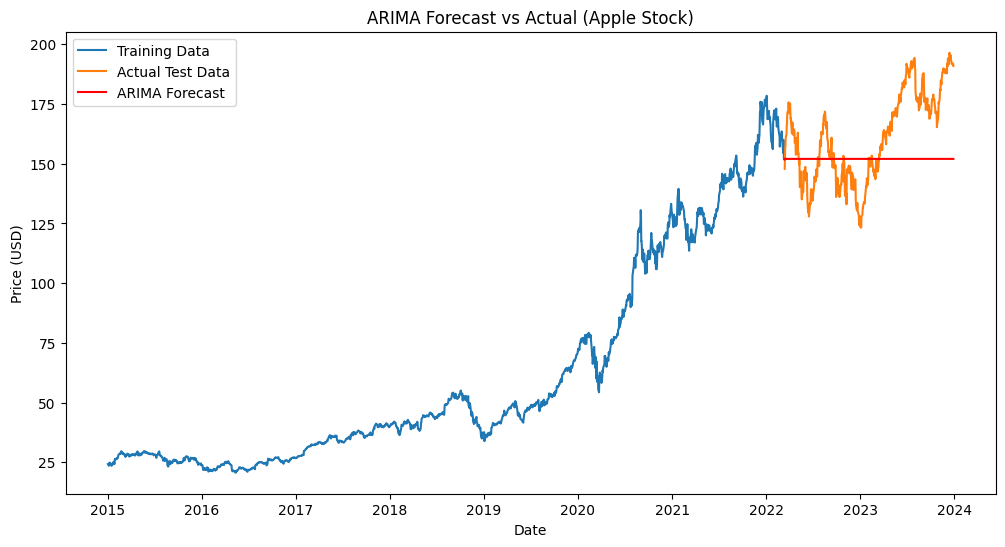

In [8]:
# Step 5B: Forecast on the test set
forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(12,6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red')
plt.title("ARIMA Forecast vs Actual (Apple Stock)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate error metrics
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 16.936385396885335
Mean Squared Error (MSE): 424.52272100110883
Root Mean Squared Error (RMSE): 20.6039491603214
